# CSC413 Assignment 2: American Sign Language

**Deadline**: March 9, 2023 by 6pm

**Submission**: Compile and submit a PDF report containing your code, outputs,
and your written solutions. Do not use screenshots and images to present
textual code/output (other than legible, hand-written answer).
You may export the completed notebook on Google Colab, but if you do so
**it is your responsibly to make sure that your code and answers do not get cut off**.

**Late Submission**: Please see the syllabus for the late submission criteria.

**Working with a partner**: You may work with a partner for this assignment.
If you decide to work with a partner, please create your group on Markus by
the deadline, even if you intend to use grace tokens. Markus does not allow
you to create groups past the deadline, even if you have grace tokens remaining.

[American Sign Language (ASL)](https://en.wikipedia.org/wiki/American_Sign_Language)
is a complete, complex language that employs signs made by 
moving the hands combined with facial expressions and postures of the body. 
It is the primary language of many North Americans who are deaf and is one of several 
communication options used by people who are deaf or hard-of-hearing.

The hand gestures representing English alphabets are shown below.

In this assignment, we will 
classify a subset of these hand gesture images using convolutional neural networks.
Specifically, given an image of a hand showing one of the letters A-I, we want to detect
which letter is being represented.

We will explore several convolutional architectures.
While we will give you a tiny
big of starter code to help make data processing a bit easier,
you'll have a chance to build your neural network all by yourself!

You may modify the starter code as you see fit, including changing the signatures of
functions and adding/removing helper functions. However, please make sure that your
TA can understand what you are doing and why.

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models, torchvision.datasets

%matplotlib inline

## Question 1. Data

If you are using your own machine, download the data from the course website on Quercus.

If you are using Google Colab, download the data set to your Google Drive by going to
the link [https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing](https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing)
and selecting "Add to My Drive".
This is faster than downloading the data from the course website.

Then, mount Google Drive from your Google Colab notebook:

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


The file structure we use is intentional,
so that we can use `torchvision.datasets.ImageFolder`
to help load our data and create labels.

In [5]:
train_path = "/content/gdrive/My Drive/asl_data/train/" # edit me
valid_path = "/content/gdrive/My Drive/asl_data/valid/" # edit me
test_path = "/content/gdrive/My Drive/asl_data/test/"   # edit me

train_data = torchvision.datasets.ImageFolder(train_path, transform=torchvision.transforms.ToTensor())
valid_data = torchvision.datasets.ImageFolder(valid_path, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.ImageFolder(test_path, transform=torchvision.transforms.ToTensor())

### Part (a) -- 2 pts

Read up on what `torchvision.datasets.ImageFolder` does for us here
[https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder](https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder)

We can iterate through the one training data point at a time like this:

In [4]:
for x, y in train_data:
    print(x.shape)
    print(y)
    break # uncomment if you'd like
  
#print(train_data[2])

torch.Size([3, 224, 224])
0


What do the variables `x` and `y` contain? What is the shape of our images?
What are our labels? How did PyTorch generate these labels from the folder structure?

Before answering this question, you will need to look at the folder structure
and look at some images in the data set.

In [ ]:
# Your explanation goes here
#
# x contain the single image data.
# y contains the corresponding label, set of labels are {0, 1,..., 8}. 
# The shape of our images are (3, 224, 224) where 3 means number of channels,
# and the image has 224x224 pixels.
# Our labels are 9 different sign languages.
# PyTorch generates these label by the different folders that image belongs to.

### Part (b) -- 2 pts

We saw in the earlier tutorials that PyTorch has a utility to help us
create minibatches with our data. We can use the same DataLoader helper
here:

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)

for x, y in train_loader:
    print(x.shape)
    print(y)
    print(y.shape)
    break # uncomment if you'd like

torch.Size([10, 3, 224, 224])
tensor([4, 3, 1, 8, 1, 7, 3, 5, 7, 5])
torch.Size([10])


What do the variables `x` and `y` contain? What are their shapes?
What data do they contain?

In [ ]:
# Your explanation goes here

# x contain a mini-batch of data, batch size is 10
# y contains the labels of each images of that mini-batch.
# x has the shape of (10, 3, 224, 224) where 10 means 10 images contained in one mini-batch 
# y has the shape of (10), where 10 means 10 labels corresponding to each image
# (possibly less than 10 in the last mini-batch)
# and 3 means the number of channels in each image
# image is 224x224

### Part (c) -- 1 pts

How many images are there in the training, validation, and test sets?

In [17]:
# Your answer (and possibly code) goes here

print("There are {} images in training set".format(len(train_data)))
print("There are {} images in validation set".format(len(valid_data)))
print("There are {} images in test set".format(len(test_data)))


There are 733 images in training set
There are 207 images in validation set
There are 223 images in test set


### Part (d) -- 3 pts

This dataset was generated by students in past machine learning courses, where
each student took several photos of themselves demonstrating the ASL hand gestures.
The file names of the images follow the following convention:
`<student-identifier>_<letter>_<img-count>.jpg`

When we split the data into training, validation, and test sets, we took care
to put photos taken by the same person in the same data set. In other words, if one of the
student's photo is in the training set, then other photos taken by the same student
will also be placed in the training set.

This way of separating the dataset into training, validation and test is more nuanced
than simply randomly splitting the photos into training/validation/test.

Explain why it is important to make sure that we split the photos into the
three datasets **by student**, so that photos from the same student are always in the
same set.

In [ ]:
# Your answer goes here

# model recognize hand gestures of a unique student in high accuracy is not good 
# for the generalization of the model, since the model may not be able to generalize 
# to different students' hand gestures. 

# Moreover, If we put the photos of same student in more than one set, the model would 
# learn from data that used for validation and testing, which can result in overfitting.

# Addtionally, If the dataset is randomly split into training, validation, and 
# test sets, it is possible that some students could eventually with large 
# propotion photos in one of the sets, which made the bias happened and affect the 
# model's performance.

## Question 2. Model Building

#### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts
the letter. Your model should be a subclass of `nn.Module`. 
You may want to review the Colab notebook demo from week 6 lectures. There is a small convolutional
neural network included in the notebook.

Here are some rules of thumb when determining your convolutional neural network architecture:

- Nowadays, people prefer small kernel sizes (e.g. 3x3 or 5x5), with many convolutional layers
  (we suggest 3-4 to start).
- Use a downsampling operation after (or with) each convolution layer
- In a typical convolutional neural network architectures, every time we downsample, we double the
  number of features (channels). This is so that we don't lose too much information in each layer.
  You may wish to make the number of output channels in your first convolutional layer a variable,
  and double this value in every subsequent convolutions.
- Typical CNNS will have a few (1-3) fully-connected layers as the final layers.

Explain your choice of neural network architecture: how many layers did you choose?
What types of layers did you use? Were they fully-connected or convolutional? What about other
decisions like pooling layers, activation functions, number of channels / hidden units.

Do not use dropout or batch normalization in this architecture.

In [ ]:
# Your code goes here

# I choose 4 convolutional layers 
# The 1st layer has 16 output channels, 
# The 2nd and 3rd layer has 32 output channels
# The 4th layer has 128 output channels

# There are 4 max pooling layer applied to each convolution layers
# for reducing image dimension and extract important features

# I choose 1 fully-conncected layers with 9 output units, 
# which produces the final prediction scores 
# The number of hidden units in fully-connected layer is 9
# since this is a 9-class classification

# I choose ReLU as activation function
# which allows CNN to learn non-linearly between image and prediction

#### Part (b) Convolutional Network with Batch Normalization - 3 pt

Build a variation of your convolutional neural network from part (a), and 
add either at least one batch normalization *or* at least one dropout layer,
but **not** both.
You will need to read the PyTorch documentation to figure out how these layers
function.

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3, out_channels=16, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=3, padding=1)

        self.conv3 = nn.Conv2d(
            in_channels=32, out_channels=32, kernel_size=3, padding=1)

        self.conv4 = nn.Conv2d(
            in_channels=32, out_channels=128, kernel_size=3, padding=1)

        self.fc = nn.Linear(128 * 14 * 14, 9)


    def forward(self, x):

        x = self.pool(torch.relu(self.conv1(x))) # 16 x 112 x 112
        x = self.pool(torch.relu(self.conv2(x))) # 32 x 56 x 56
        x = self.pool(torch.relu(self.conv3(x))) # 32 x 28 x 28
        x = self.pool(torch.relu(self.conv4(x))) # 128 x 14 x 14
        
        x = x.view(-1, 128 * 14 * 14)
    
        return self.fc(x)



#### Part (c) Architecture Decision - 1 pt

It does not make sense to add the batch normalization or dropout layer as
your *final* layer. Explain why this is the case.

In [ ]:
# Your answer goes here

# Batch normalization layers are usually added during traning, such as after 
# convolutional or fully-connected layers to normalize the output of the 
# previous layer and speed up the training process. 

# Applied batch normalization to the final layer might noise the output
# probabilities, which negatively affects the performance of the model.

## Question 3. Training Code and Sanity Checking

#### Part (a) Accuracy - 3 pt

Compute the `get_accuracy` function, which computes the model accuracy across a dataset:

In [7]:
def get_accuracy(model, data):
    # note: why should we use a larger batch size here?
    # For speeding up the evaluation process.
    loader = torch.utils.data.DataLoader(data, batch_size=256)

    model.eval() # annotate model for evaluation (why do we need to do this?)
    # Applied this method could avoid the effectness of the different 
    # behavior of dropout and batch normalization during training and validation.

    correct = 0
    total = 0
    for imgs, labels in loader:
      output = model(imgs)
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]

    return correct / total # TODO: return the model accuracy

#### Part (b) Training Code - 8 pt

Write code to train your neural network given some training data. Your training code
should make it easy to tweak hyperparameters. Make sure that you are checkpointing
your models from time to time (the frequency is up to you). 

Here's what we will be looking for:

- using the data loader to load the training data
- using the correct choice of loss function and a reasonable optimizer
- shuffling the training data at the start of each epoch
- in each iteration, take `batch_size` samples from the data set
- use the correct labels from the data set
- computing the forward and backward passes
- after every epoch, **checkpoint your model** (A1 had instructions and examples for how to do this)
- after every epoch, report the accuracies for the training set and validation set
- track the training curve information and **plot the training curve**
- correctly handling edge cases (e.g. why might the last batch be smaller than the rest?)

Don't forget the checkpointing step. You will need to load your model weights later.

In [8]:
def train(model, batch_size, weight_decay, optimizer, learning_rate,
          momentum, num_epochs):
  
    # using the data loader to load the training data
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # using the correct choice of loss function
    criterion = nn.CrossEntropyLoss()

    # using the correct choice reasonable optimizer
    assert optimizer in ("sgd", "adam")
    if optimizer == "sgd":
        optimizer = optim.SGD(model.parameters(),
                              lr=learning_rate,
                              momentum=momentum,
                              weight_decay=weight_decay)
        print("Taking sgd as optimizer.\n")
    else:
        optimizer = optim.Adam(model.parameters(),
                               lr=learning_rate,
                               weight_decay=weight_decay)
        print("Taking adam as optimizer.\n")
    
    # track learning curve
    iters, losses, train_acc, val_acc = [], [], [], []
    
    # training
    n = 0 # the number of iterations (for plotting)
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            if imgs.size()[0] < batch_size:
                continue

            model.train() # annotate model for training
            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)  # compute *average* loss
            train_acc.append(get_accuracy(model, train_data)) # compute training accuracy 
            val_acc.append(get_accuracy(model, valid_data)) # compute validation accuracy
            n += 1

        print("Epoch {}, Training accuracy: {}, Validation accuracy: {}".
                  format(epoch, 
                          get_accuracy(model, train_data), 
                          get_accuracy(model, valid_data)))
        

    # plotting
    plt.title("Learning Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Learning Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


#### Part (c) Overfit to a Small Dataset - 2 pt

One way to sanity check our neural network model and training code is to check whether 
each of your two models is capable of "memorizing" or "overfitting" to a small dataset. Construct
a small dataset (e.g. 1-2 image per class). Then show that your model and training code
is capable of overfitting on that small dataset. You should be able to obtain a 100% 
training accuracy on that small dataset relatively quickly (i.e. within a few hundred iterations,
possibly more depending on your learning rate).

This question is really here to make sure that your model/training code is correct.
The question itself is not worth much, but your results here will diagnose issues
from other parts of your code.
If your models cannot overfit the small dataset quickly, then there is
a bug in either your model code and/or your training code. Fix the issues
before you proceed to the next step.

In [12]:
# Your code goes here

# I have constructed small dataset with only one image per class

small_train_path = "/content/gdrive/My Drive/asl_data/small_train/" # edit me
small_valid_path = "/content/gdrive/My Drive/asl_data/small_valid/" # edit me
small_test_path = "/content/gdrive/My Drive/asl_data/small_test/"   # edit me

small_train_data = torchvision.datasets.ImageFolder(small_train_path, transform=torchvision.transforms.ToTensor())
small_valid_data = torchvision.datasets.ImageFolder(small_valid_path, transform=torchvision.transforms.ToTensor())
small_test_data = torchvision.datasets.ImageFolder(small_test_path, transform=torchvision.transforms.ToTensor())

print("There are {} images in small training set".format(len(small_train_data)))
print("There are {} images in small validation set".format(len(small_valid_data)))
print("There are {} images in small test set".format(len(small_test_data)))

small_model = CNN()

batch_size = 16
weight_decay = 0.0001
optimizer = "adam"
learning_rate = 0.1
momentum = 0.9  # only for sgd optimizer
num_epochs = 10

train(small_model, batch_size, weight_decay, optimizer, learning_rate, momentum, num_epochs)

There are 9 images in small training set
There are 9 images in small validation set
There are 9 images in small test set
Taking adam as optimizer.



KeyboardInterrupt: ignored

## Question 4. Training

### Part (a) -- 5 points

Train your first network on your training set.
Plot the training curve, and include your plot in your writeup.

Make sure that you are checkpointing frequently!

Taking adam as optimizer.

Epoch 0, Training accuracy: 0.11869031377899045, Validation accuracy: 0.11594202898550725
Epoch 1, Training accuracy: 0.18963165075034105, Validation accuracy: 0.15942028985507245
Epoch 2, Training accuracy: 0.12005457025920874, Validation accuracy: 0.12077294685990338
Epoch 3, Training accuracy: 0.30286493860845837, Validation accuracy: 0.357487922705314
Epoch 4, Training accuracy: 0.3424283765347885, Validation accuracy: 0.32367149758454106
Epoch 5, Training accuracy: 0.4529331514324693, Validation accuracy: 0.4444444444444444
Epoch 6, Training accuracy: 0.5470668485675307, Validation accuracy: 0.6231884057971014
Epoch 7, Training accuracy: 0.6248294679399727, Validation accuracy: 0.6763285024154589
Epoch 8, Training accuracy: 0.6630286493860846, Validation accuracy: 0.6038647342995169
Epoch 9, Training accuracy: 0.757162346521146, Validation accuracy: 0.7584541062801933
Epoch 10, Training accuracy: 0.7776261937244202, Validation accuracy: 0.719806763285024

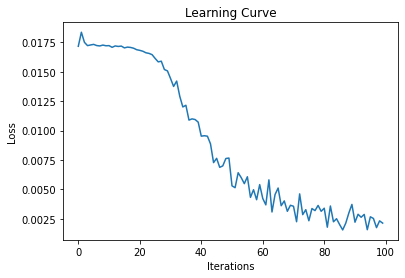

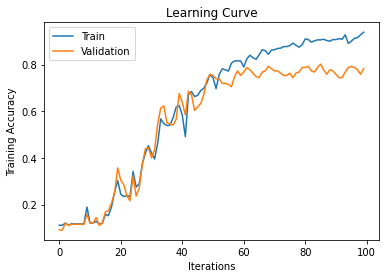

Final Training Accuracy: 0.9386084583901774
Final Validation Accuracy: 0.782608695652174


In [9]:
# Your code goes here. Make sure to include the training curve.

model1 = CNN()

batch_size = 128
weight_decay = 0.0001
optimizer = "adam"
learning_rate = 0.001
momentum = 0.9  # only for sgd optimizer
num_epochs = 20

train(model1, batch_size, weight_decay, optimizer, learning_rate, momentum, num_epochs)


### Part (b) -- 2 points

You should have tried several hyperparameter choices before deciding on one set
of hyperparameters to use for Part (a).
In this section, briefly explain the hyperparamter choices that you tried, 
and how they impacted your training.

In [ ]:
# Your explanation goes here.

# Based on the dataset, I have tried the following hyperparameters:

# 0.0001 learning rate, this is a good rate to make convergence happenen

# adam optimizer, 
# since it has adaptive learning rate, and it could move faster through 
# flat regions of loss
# not only save time but also good for training

# batch size of 128
# since larger batch size could decrease the training time
# (This training is really time consuming)

# 20 epochs, 
# since the model is likely to converge after epoch 9, so I
# choose 10 more epochs to see if the model could continue increase 
# the validation accuracy, there is no point to have epoch more than
# 20 since the accuracy converges before 20

# 0.0001 weight decay
# this is a good start number for avoiding overfitting

### Part (c) -- 5 points

Train your second network on your training set.
Plot the training curve, and include your plot in your writeup.

Make sure that you are checkpointing frequently!

Taking sgd as optimizer.

Epoch 0, Training accuracy: 0.10914051841746249, Validation accuracy: 0.12560386473429952
Epoch 1, Training accuracy: 0.10368349249658936, Validation accuracy: 0.13043478260869565
Epoch 2, Training accuracy: 0.12824010914051842, Validation accuracy: 0.14492753623188406
Epoch 3, Training accuracy: 0.11732605729877217, Validation accuracy: 0.11594202898550725
Epoch 4, Training accuracy: 0.1145975443383356, Validation accuracy: 0.11594202898550725
Epoch 5, Training accuracy: 0.13096862210095497, Validation accuracy: 0.0966183574879227
Epoch 6, Training accuracy: 0.1377899045020464, Validation accuracy: 0.12077294685990338
Epoch 7, Training accuracy: 0.12414733969986358, Validation accuracy: 0.12077294685990338
Epoch 8, Training accuracy: 0.12141882673942701, Validation accuracy: 0.12077294685990338
Epoch 9, Training accuracy: 0.12141882673942701, Validation accuracy: 0.12077294685990338
Epoch 10, Training accuracy: 0.12141882673942701, Validation accuracy: 0.1207

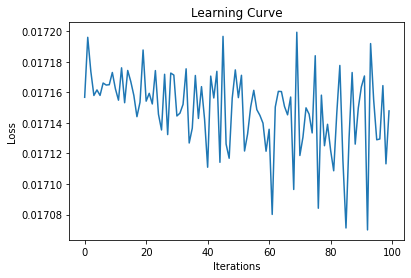

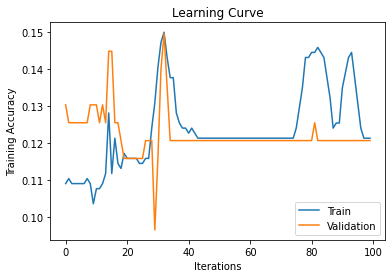

Final Training Accuracy: 0.12141882673942701
Final Validation Accuracy: 0.12077294685990338


In [12]:
# Your code goes here. Make sure to include the training curve.

model2 = CNN()

batch_size = 128
weight_decay = 0.0001
optimizer = "sgd"
learning_rate = 0.001
momentum = 0.9 # only for sgd optimizer
num_epochs = 20

train(model2, batch_size, weight_decay, optimizer, learning_rate, momentum, num_epochs)

### Part (d) -- 2 points

You should have tried several hyperparameter choices before deciding on one set
of hyperparameters to use for Part (c).
In this section, briefly explain the hyperparamter choices that you tried, 
and how they impacted your training.

In [ ]:
# Your explanation goes here.

# Based on the dataset, I have tried the following hyperparameters:

# 0.0001 learning rate, this is a good rate to make convergence happenen

# sgd optimizer, 
# I just tried the other optimizer and see how it doing

# batch size of 128
# since larger batch size could decrease the training time
# (This training is really time consuming)

# 20 epochs, 
# since the model is likely to converge after epoch 9, so I
# choose 10 more epochs to see if the model could continue increase 
# the validation accuracy, there is no point to have epoch more than
# 20 since the accuracy converges before 20

# 0.0001 weight decay
# this is a good start number for avoiding overfitting

### Part (e) -- 1 pts

Out of all the models (i.e. parts (a) vs (c), and the various hyperparameter choices)
that you tried, which model is the "best"?
If you were to select a single set of weight values (checkpoints)
to deploy and use in a real application, which would you choose?

In [ ]:
# Your explanation goes here.

# The model from part(a) is better, I will choose the 
# 20th epoch of part(a) model since it performs best in my a2

## Question 5. Transfer Learning

For many image classification tasks, it is generally not a good idea to train a
very large deep neural network model from scratch due to the enormous compute
requirements and lack of sufficient amounts of training data.

One of the better options is to try using an existing model that performs a
similar task to the one you need to solve. This method of using a
pre-trained network for other similar tasks is broadly termed
**Transfer Learning**. In this question, we will use Transfer Learning
to extract features from the hand gesture images. Then, train a smaller
network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, the AlexNet architecture played a pivotal role in
establishing Deep Neural Nets as a go-to tool for image classification
problems and we will use an ImageNet pre-trained AlexNet model to
extract features in this assignment.

### Part (a)

Here is the code to load the AlexNet network, with pretrained weights.
When you first run the code, PyTorch will download the pretrained weights
from the internet.

In [22]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The `alexnet` model is split up into two components: `alexnet.features` and 
`alexnet.classifier`.  The first neural network component, `alexnet.features`,
is used to
computed convolutional features, which is taken as input in `alexnet.classifier`.

The neural network `alexnet.features` expects an image tensor of shape
Nx3x224x224 as inputs and it will output a tensor of shape Nx256x6x6 . (N = batch size).

Here is an example code snippet showing how you can compute the AlexNet
features for some images (your actual code might be different):

In [23]:
img, label = train_data[0]
features = alexnet.features(img.unsqueeze(0)).detach()

Note that the `.detach()` at the end will be necessary in your code. The reason is that
PyTorch automatically builds computation graphs to be able to backpropagate
gradients. If we did not explicitly "detach" this tensor from the AlexNet portion
of the computation graph, PyTorch might try to backpropagate gradients to the AlexNet
weight and tune the AlexNet weights.

Compute the AlexNet features for each of your training, validation, and test data.
In other words, create three new arrays called `train_data_features`, `valid_data_features`
and `test_data_features`. Each of these arrays should contain tuples of the form 
`(alexnet_features, label)`

In [ ]:
# Modify this code

train_data_features = []
for img, y in train_data:
	features = None  # compute the alex net features based on the image
    train_data_features.append((features, y),)

### Part (b)


Create a multi-layer preceptron that
takes **as input** these AlexNet features,
and makes a prediction. Your model should be a subclass of `nn.Module`.

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # ... todo ...

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)
        # ... todo ...

### Part (c)

Train the `MLP()` model for at least 6 epochs, and report
on the maximum validation accuracy that you can attain.

This model should train *much* faster since it has very few parameters.
However, this model should attain much better accuracy much faster!

In [ ]:
mlp = MLP()
train(mlp, train_data_new, valid_data_new)

## Question 6. Test Accuracy

### Part (a) -- 5 pts

Report the test accuracies of your **single best** model for the test set, including
any model that you trained (including in Q5).

In [13]:
# Write your code here. Make sure to include the test accuracy in your report

# My single best model is the model of Question 4 part(a)

print("Test Accuracy\n")
print("Q4 Part(a): {}".format(get_accuracy(model1, test_data)))
print("Q4 Part(c): {}".format(get_accuracy(model2, test_data)))

Test Accuracy

Q4 Part(a): 0.7219730941704036
Q4 Part(c): 0.1210762331838565


### Part (b) -- 1 pts

Display one image that your model correctly classified.

Correct label: 0
Predicted label: 0


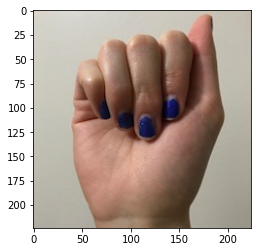

In [46]:
# Make sure both your code and image are visible to the TA

img_path = "/content/gdrive/My Drive/asl_data/test/A/02_A_1.jpg"
img = plt.imread(img_path)
plt.imshow(img)

image, label = test_data[3]
output = model1(image)
pred = output.max(1, keepdim=True)[1]

print("Correct label: {}".format(label))
print("Predicted label: {}".format(pred.item()))

### Part (b) -- 1 pts

Display one image that your model incorrectly classified. (If your test performance was 100%, please just say so.)

Correct label: 0
Predicted label: 8


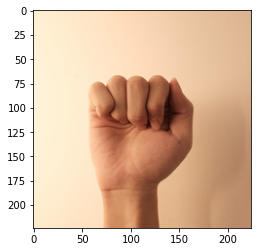

In [45]:
# Make sure both your code and image are visible to the TA

img_path = "/content/gdrive/My Drive/asl_data/test/A/01_A_1.jpg"
img = plt.imread(img_path)
plt.imshow(img)

image, label = test_data[0]
output = model1(image)
pred = output.max(1, keepdim=True)[1]

print("Correct label: {}".format(label))
print("Predicted label: {}".format(pred.item()))

## Question 6. Adversarial Examples -- 2 pts

In this question you will take the trained model you selected in Q4 (e),
and you will freeze its weights (i.e. do not optimize it further). Let's call this model $f()$.
Select an image (let's call it $x$) from the test set, where $f(x)$ outputs the correct label $y$.
Then, compute an adversarial noise image (let's call it $n$) that you will add to $x$ in order to change
the original label to an incorrect one, i.e. $f(x + n) \neq f(x)$, while keeping the value of the noise
pixels small, i.e. $|n_{i,j}| < \epsilon$. You have control over $\epsilon$, but keep in mind that the
noise should be imperceptible to the human eye when not zooming into the image.

In [ ]:
#
# Make sure your code, original image x, and the corrupted image x + n are shown to the TA
# Show the output f(x) = y and the output f(x + n) is different than y.
#

## Question 7. Work Allocation -- 1 pts

This question is to make sure that if you are working with a partner, that
you and your partner contributed equally to the assignment.

Please have each team member write down the times that you worked on the
assignment, and your contribution to the assignment.

In [ ]:
# Your answer goes here
# I work alone and I contributed the entire assignment